<a href="https://colab.research.google.com/github/reza-pishva/6-MachineLearning-Python/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import os
import tensorflow as tf

In [44]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [45]:
data_dir = './drive/MyDrive/dataset'

In [46]:
image_exts = ['jpeg','jpg','bmp','png']

In [47]:
image_exts[0]

'jpeg'

In [ ]:
os.listdir(os.path.join(data_dir,'sad'))

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

In [51]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
        image = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('image not in ext list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))

In [ ]:
cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
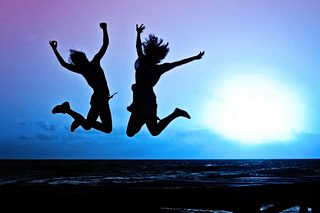

In [53]:
img = cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))
img

In [ ]:
img.shape

In [ ]:
plt.imshow(img)

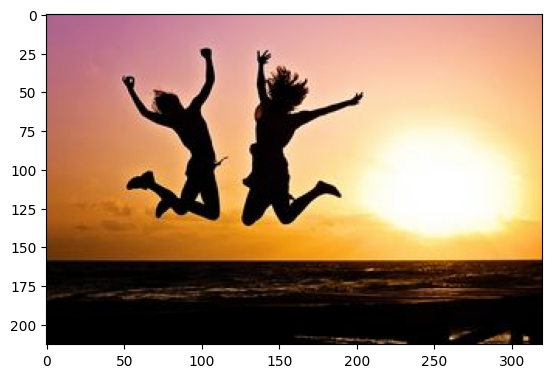

In [57]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [61]:
import numpy as np

In [63]:
tf.keras.utils.image_dataset_from_directory??

In [62]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1117 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [64]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
batch

In [66]:
len(batch)

2

In [68]:
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [69]:
batch[0].shape

(32, 256, 256, 3)

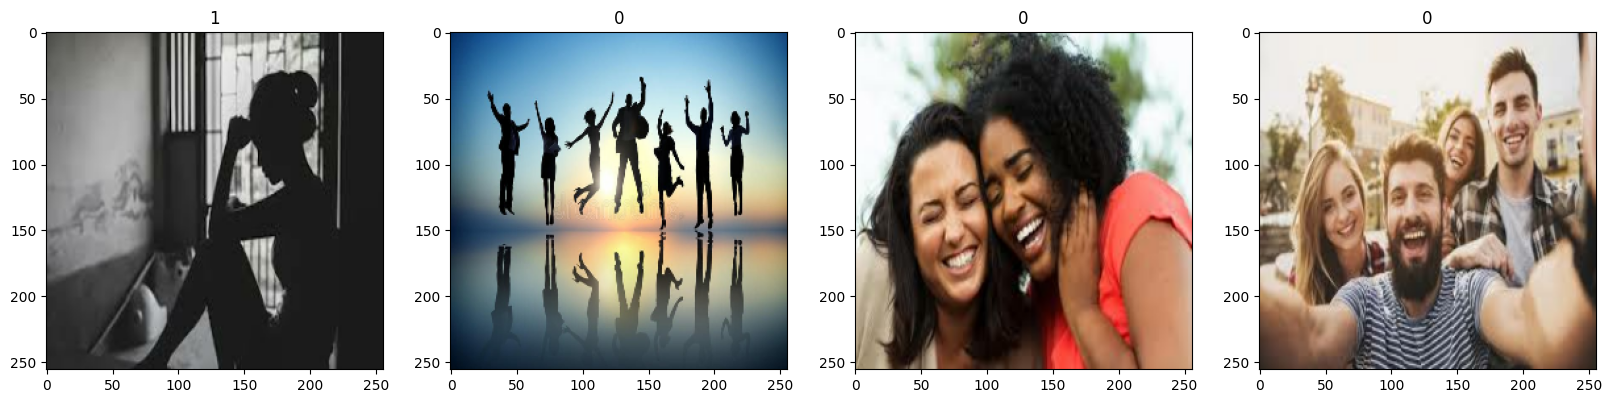

In [70]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])